In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 109.2MB 36kB/s 
     |████████████████████████████████| 491kB 60.0MB/s 
     |████████████████████████████████| 3.2MB 53.0MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/DataSet.zip'
#!unzip '/content/drive/My Drive/Colab Notebooks/flower_dataset.zip'
#!unzip '/content/drive/My Drive/Cat.zip'

In [0]:
from keras.preprocessing.image import load_img,img_to_array,array_to_img,ImageDataGenerator
from skimage.transform import resize
from skimage.color import lab2rgb,rgb2lab,gray2rgb
from skimage.io import imsave
import os
import cv2
import numpy as np
import keras
from keras.models import Sequential,Model,load_model
from keras.layers import Conv2D, UpSampling2D, Input,Dropout
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [0]:
################ EXTRA -------------------------------
path = '/content/DataSet/data_256_extra/'
#path = '/content/Cat'
#path = '/content/flower dataset/'
train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, target_size=(224, 224),batch_size=9000,class_mode=None)

Found 105321 images belonging to 20 classes.


In [0]:
################ EXTRA ----------------------------
vggmodel = keras.applications.vgg16.VGG16()
#vggmodel.save('/content/drive/My Drive/weights/vggmodelnew.h5')
newmodel = Sequential() 
num = 0
for i, layer in enumerate(vggmodel.layers):
    if i<19:
      newmodel.add(layer)
        
newmodel.summary()
for layer in newmodel.layers:
  layer.trainable=False

#newmodel.save('/content/drive/My Drive/weights/vggmodel1.h5')
#newmodel=load_model('/content/drive/My Drive/weights/vggmodel1.h5')


553467904/553467096 [==============================] - 6s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
____________________________________________________

In [0]:
##############################Extra --------------------------------
##############################Decoder-----------------------------------------

#Encoder
encoder_input = Input(shape=(7, 7, 512,))
#Decoder
decoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_input)
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)

model.compile(optimizer='Adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         1179904   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         295040    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        1846

In [0]:
model.load_weights('/content/drive/My Drive/human dataset weights continue 35/weights 30 stepper epoch loop 200 batch training from bestoneyet/new0.hdf5')

In [0]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=2)

for i in range(3,4):
  print(i)
  X =[]
  Y =[]
  for img in train[i]:
    try:
        lab = rgb2lab(img)
        X.append(lab[:,:,0])
        Y.append(lab[:,:,1:] / 128)
    except:
      print('error')
  X = np.array(X)
  Y = np.array(Y)
  X = X.reshape(X.shape+(1,))
  print(X.shape)
  print(Y.shape)
  
  vggfeatures = []
  for v, sample in enumerate(X):
    sample = gray2rgb(sample)
    sample = sample.reshape((1,224,224,3))
    prediction = newmodel.predict(sample)
    prediction = prediction.reshape((7,7,512))
    vggfeatures.append(prediction)
  vggfeatures = np.array(vggfeatures)
  print(vggfeatures.shape)

  
  #history = model.fit(vggfeatures, Y,validation_split=0.33, verbose=1, epochs=200, batch_size=100, callbacks=[early_stopping])
  history = model.fit(vggfeatures, Y,validation_split=0.33, verbose=1, epochs=300, batch_size=100)

  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  model.save_weights('/content/drive/My Drive/human dataset weights continue 35/continue35final_model'+str(i)+'.h5')
  model.load_weights('/content/drive/My Drive/human dataset weights continue 35/continue35final_model'+str(i)+'.h5')


In [0]:
model.load_weights('/content/drive/My Drive/human dataset weights continue 35/continue35final_model0.h5')
#model=load_model('/content/drive/My Drive/weights/final_model.h5')
#model.summary()

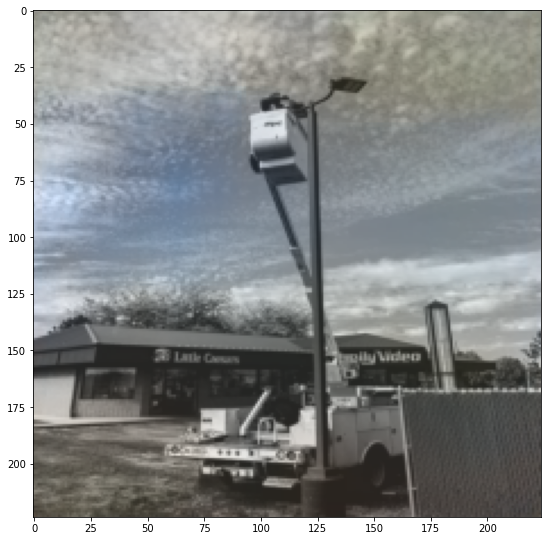

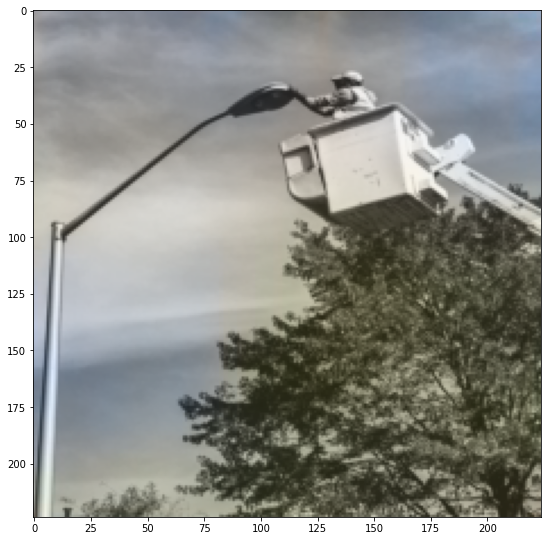

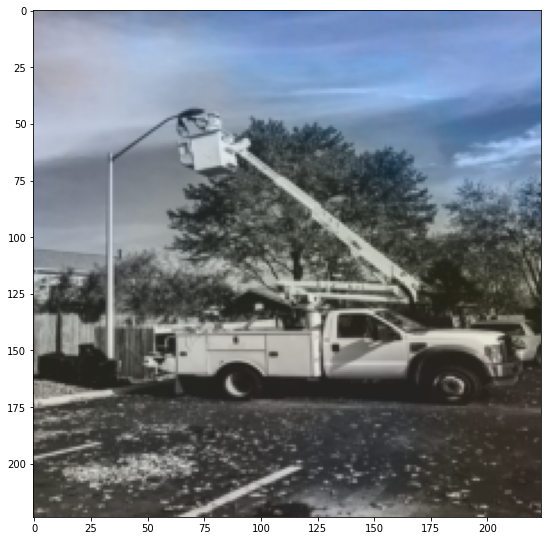

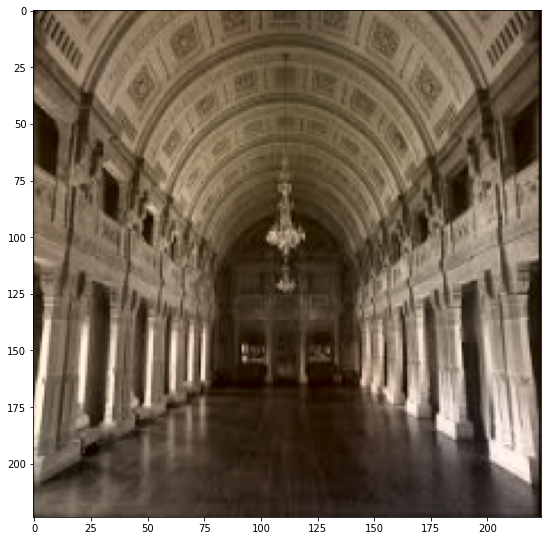

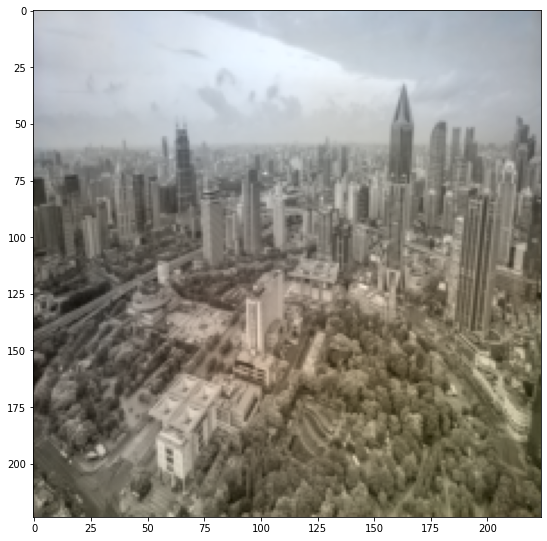

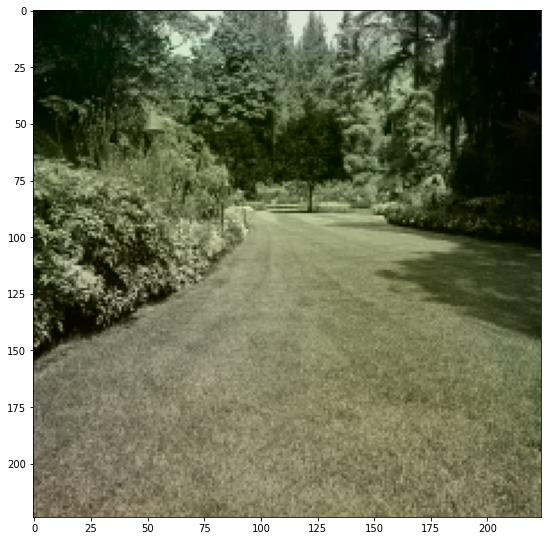

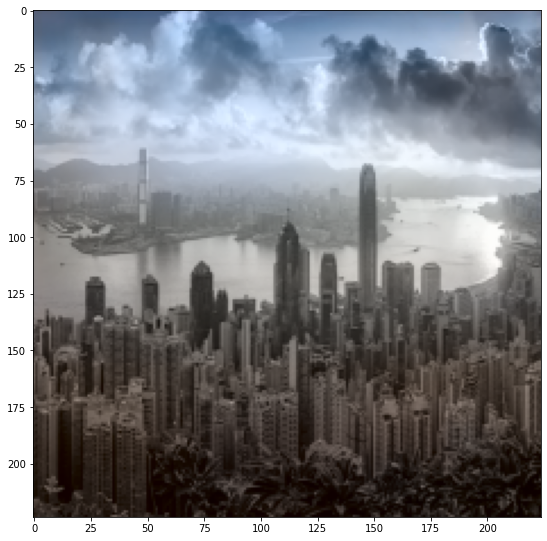

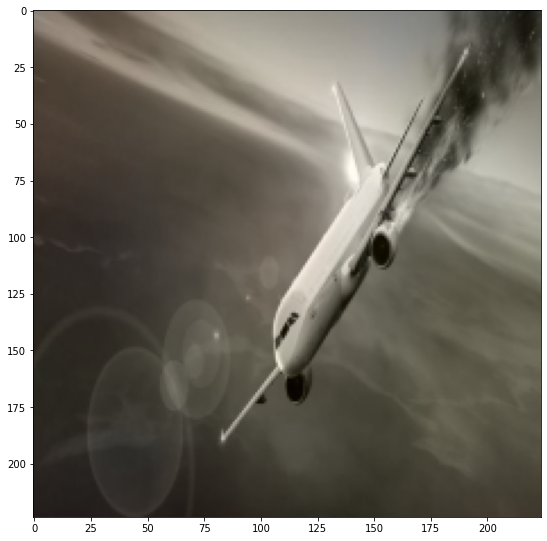

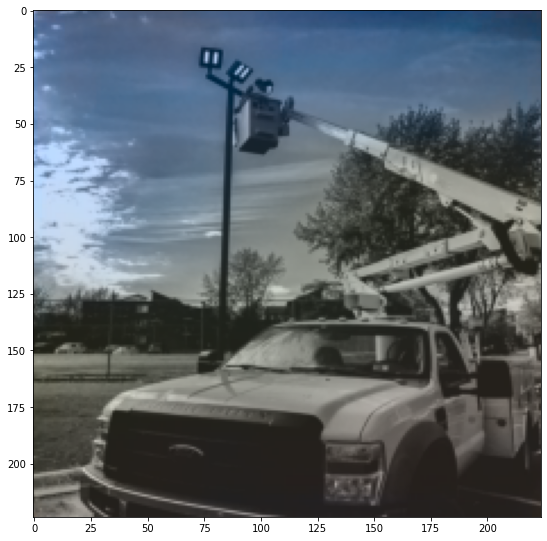

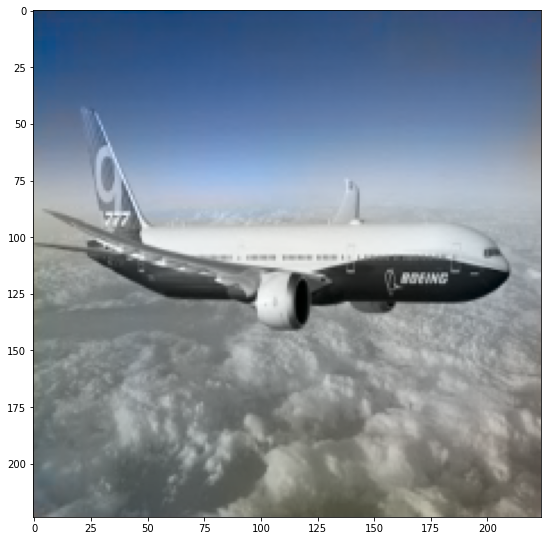

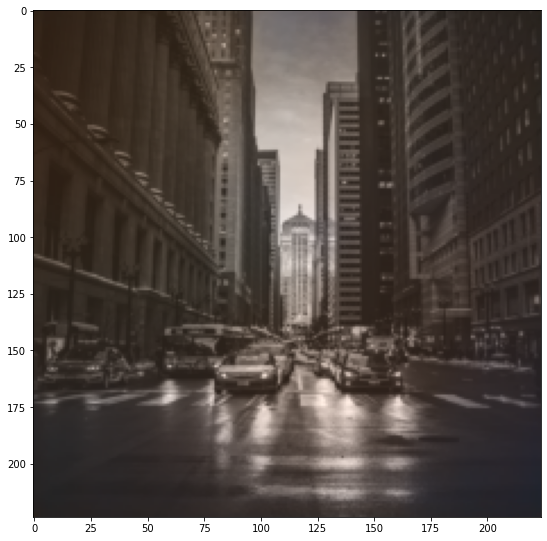

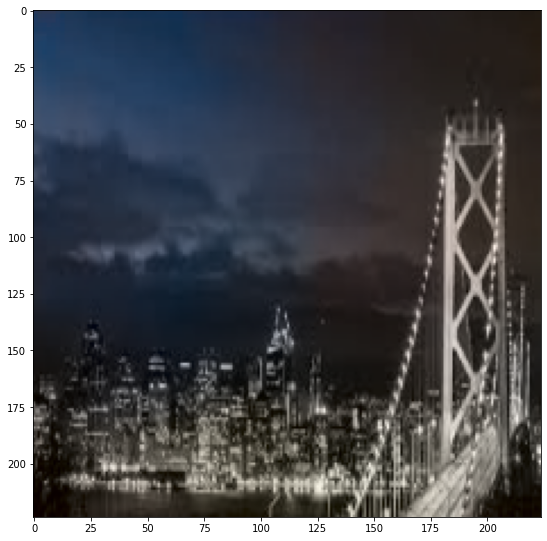

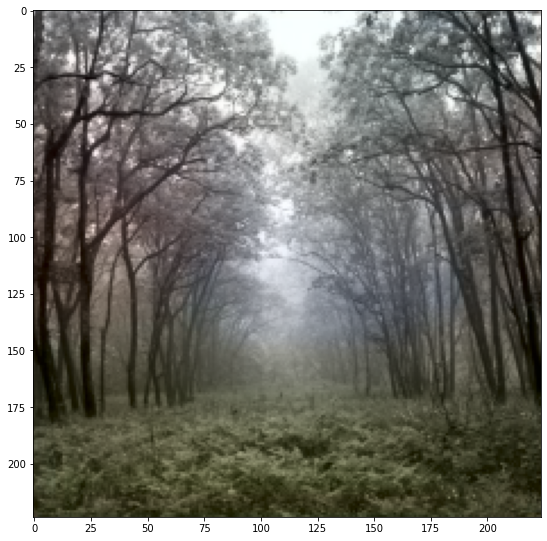

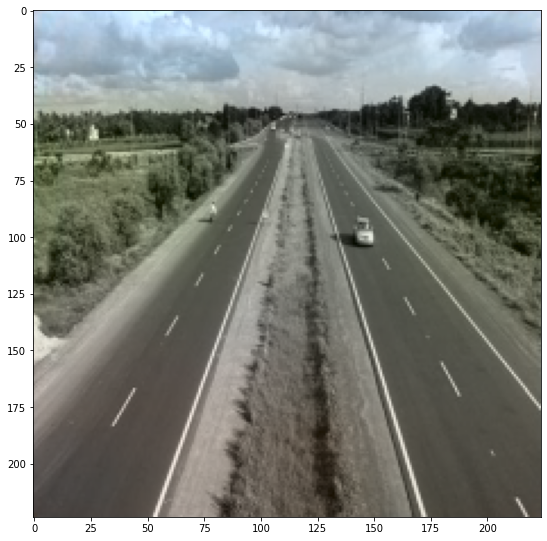

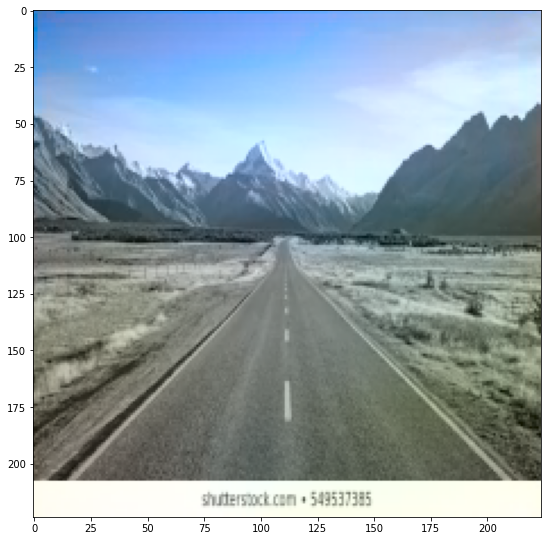

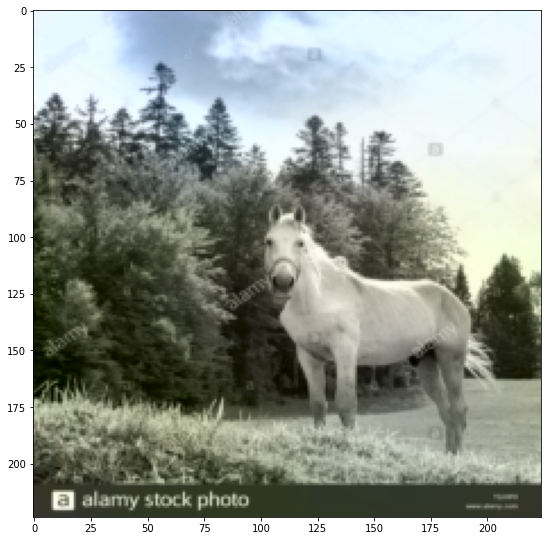

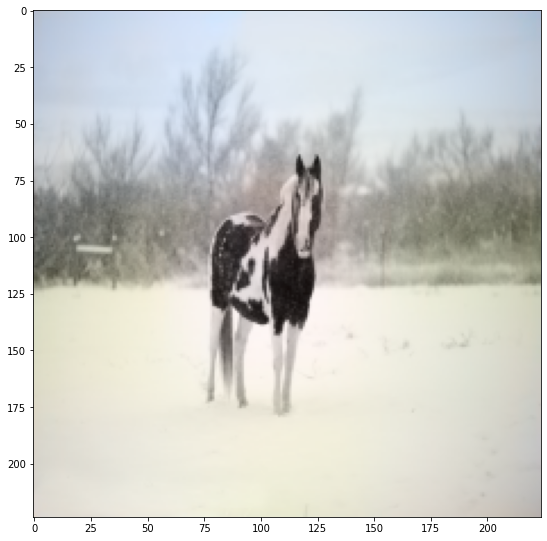

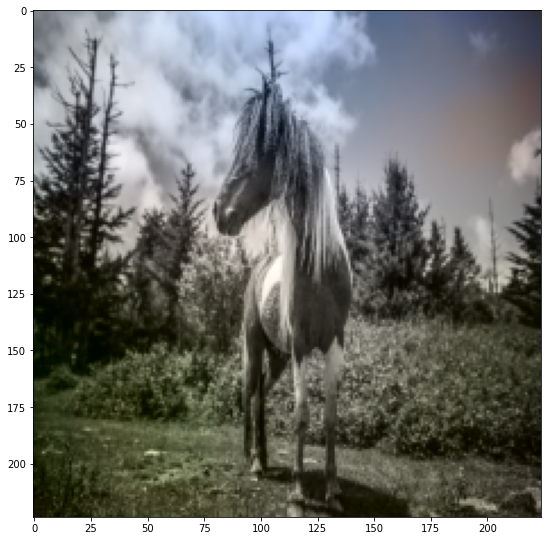

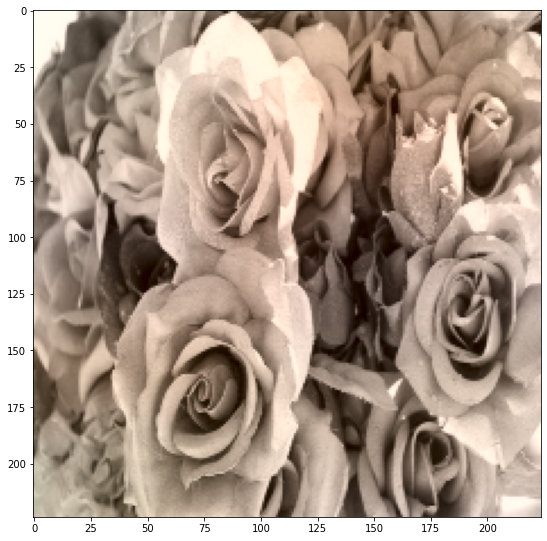

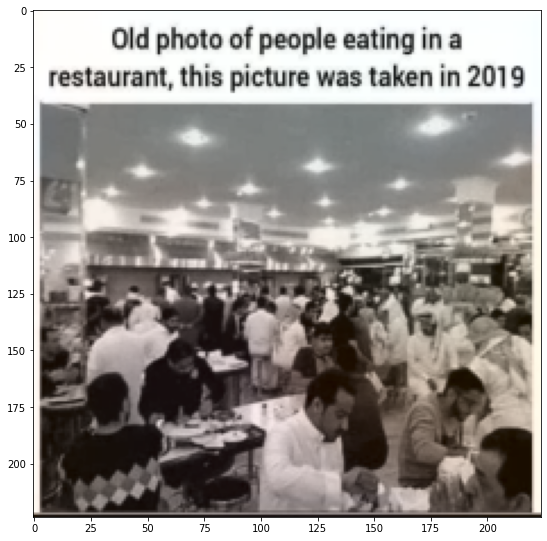

In [0]:
##############################Extra --------------------------------

testpath = '/content/drive/My Drive/Test1/'
files = os.listdir(testpath)
for idx, file in enumerate(files):
    if file != None:  
      test = img_to_array(load_img(testpath+file))
      test = resize(test, (224,224), anti_aliasing=True)
      test*= 1.0/255
      lab = rgb2lab(test)
      l = lab[:,:,0]
      L = gray2rgb(l)
      L = L.reshape((1,224,224,3))
      #print(L.shape)
      vggpred = newmodel.predict(L)
      ab = model.predict(vggpred)
      #print(ab.shape)
      ab = ab*128
      cur = np.zeros((224, 224, 3))
      cur[:,:,0] = l
      cur[:,:,1:] = ab
      #imsave('/content/drive/My Drive/result/relt'+str(idx)+".jpg", lab2rgb(cur))
      fxpic = array_to_img(lab2rgb(cur))
      plt.figure(figsize=[20,20])
      plt.subplot(121)
      plt.imshow(fxpic, cmap='gray')